In [8]:
# BUEN TRABAJO, se recomienda comentar el código
# 5.0
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
df=pd.read_csv("Colombia_COVID19_Coronavirus_casos_diarios.csv")

df_max_scaled=df.copy() #hacer una copia
df_max_scaled["norm_new_cases"]=df_max_scaled["NUEVOS_CASOS"]/df_max_scaled["NUEVOS_CASOS"].abs().max() #normalizar

In [10]:
df_max_scaled["FECHA_NEW"]=pd.to_datetime(df_max_scaled["FECHA_ACTUALIZACION"])

h=10
def fun(num):
    if abs(num/h) <= 1:
        result = (3/4)*(1 - (num/h) ** 2)
    else:
        result = 0
    return result

k=[]
for date in sorted(df_max_scaled["FECHA_NEW"]):
    df_max_scaled["gauss_filter"]=(df_max_scaled["FECHA_NEW"]-date).dt.days.apply(fun)
    df_max_scaled["gauss_filter"] /=df_max_scaled["gauss_filter"].sum()
    k.append((df_max_scaled["gauss_filter"]*df_max_scaled["norm_new_cases"]).sum())
df_max_scaled["cases_Gaussian_filter"]=k


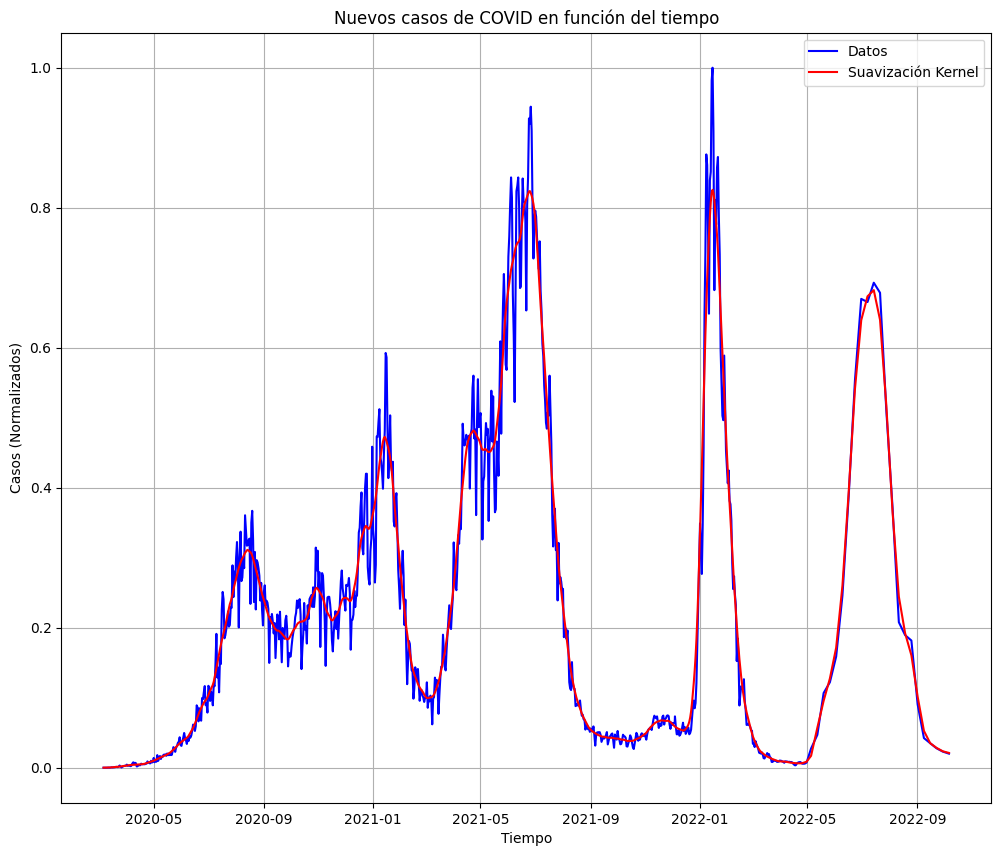

In [11]:
# Gráfica de los datos y suavización
plt.figure(figsize=(12,10))
plt.plot(df_max_scaled["FECHA_NEW"],df_max_scaled["norm_new_cases"], color = "blue", label = "Datos")
plt.plot(df_max_scaled["FECHA_NEW"],df_max_scaled["cases_Gaussian_filter"], color = "red", label= "Suavización Kernel")
plt.legend()
plt.ylabel("Casos (Normalizados)")
plt.xlabel("Tiempo")
plt.title("Nuevos casos de COVID en función del tiempo")
plt.grid()
plt.show()